# Assignment 1 - STQD6024 - Machine Learning
-   Ahmad Hathim bin Ahmad Azman (P153146)

This assignment is done to fulfil requirements of STQD6024 Machine Learning, as part of Masters of Science (Data Science and Analytics)

<a name="intro"></a>

# Introduction

-   This is a copy dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition).

The purpose of this project is to analyze a dataset containing details on 

---

Contents:
*   [Introduction](#intro)
*   [Problem Statement](#problem-statement)
*   [Data Cleaning](#data-cleaning)
*   [Visualization](#visualization)
*   [Insights and Explanations](#InE)
*   [Conclusion](#conclusion)
*   [References](#references)
*   [Future Endeavours](#FnE)

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from statsmodels import api as sm

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data/student-por.csv', sep=';')

In [5]:
# variable information 
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


1. `school` - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. `sex` - student's sex (binary: "F" - female or "M" - male)
3. `age` - student's age (numeric: from 15 to 22)
4. `address` - student's home address type (binary: "U" - urban or "R" - rural)
5. `famsize` - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6. `Pstatus` - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7. `Medu` - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. `Fedu` - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. `Mjob` - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. `Fjob` - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. `reason` - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. `guardian` - student's guardian (nominal: "mother", "father" or "other")
13. `traveltime` - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. `studytime` - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. `failures` - number of past class failures (numeric: n if 1<=n<3, else 4)
16. `schoolsup` - extra educational support (binary: yes or no)
17. `famsup` - family educational support (binary: yes or no)
18. `paid` - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. `activities` - extra-curricular activities (binary: yes or no)
20. `nursery` - attended nursery school (binary: yes or no)
21. `higher` - wants to take higher education (binary: yes or no)
22. `internet` - Internet access at home (binary: yes or no)
23. `romantic` - with a romantic relationship (binary: yes or no)
24. `famrel` - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. `freetime` - free time after school (numeric: from 1 - very low to 5 - very high)
26. `goout` - going out with friends (numeric: from 1 - very low to 5 - very high)
27. `Dalc` - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. `Walc` - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. `health` - current health status (numeric: from 1 - very bad to 5 - very good)
30. `absences` - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

31. `G1` - first period grade (numeric: from 0 to 20)
32. `G2` - second period grade (numeric: from 0 to 20)
33. `G3` - final grade (numeric: from 0 to 20, output target)

In [6]:
# Target variable
y = df['G3']
y

0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 649, dtype: int64

In [7]:
# Drop target from features
X = df.drop(columns=['G3', 'G2', 'G1'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [8]:
# Separate categorical and numerical features
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing

In [9]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

X_processed = preprocessor.fit_transform(X)

In [10]:
# 1. Get numeric column names (unchanged by StandardScaler)
num_features = num_cols

# 2. Get categorical feature names (after OneHotEncoder)
cat_transformer = preprocessor.named_transformers_['cat']
cat_feature_names = cat_transformer.get_feature_names_out(cat_cols)

# 3. Combine them
feature_names = list(num_features) + list(cat_feature_names)

# 4. Transform X and convert to DataFrame
X_processed = preprocessor.transform(X)
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

In [11]:
X_processed_df.shape

(649, 39)

In [12]:
X_processed_df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,1.031695,1.310216,1.540715,0.576718,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.210137,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1.119748,-0.171647,-0.157380,-0.543555,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,0.538553,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,-1.432980,1.310216,-0.278983,-0.760032,1.290114,-0.374305,-0.974536,-1.123771,-1.008546,-0.543555,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,-0.611422,0.428131,0.630866,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,-0.543555,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1.853254,-0.453954,0.630866,-0.760032,1.290114,1.312667,1.119748,0.780478,-1.008546,-0.543555,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
645,1.031695,0.428131,-1.188832,-0.760032,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
646,1.031695,-1.336039,-1.188832,0.576718,0.083653,-0.374305,-3.068820,-2.075896,-1.859711,-0.543555,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
647,0.210137,0.428131,-1.188832,0.576718,-1.122808,-0.374305,-2.021678,0.780478,1.544950,1.620662,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


# Model Building

In [22]:
model = LinearRegression()
cv = KFold(n_splits=5, shuffle=True)

## Forward Selection

In [23]:
sfs_forward = SFS(model,
          k_features=(1,len(X_processed_df.columns)), # Number of features to select
          forward=True,   # Forward selection
          floating=False, # No floating
          scoring='neg_mean_squared_error',  # Scoring metric
          n_jobs=-1, # Use all processors
          cv=cv)           # Cross-validation folds

In [24]:
sfs_forward = sfs_forward.fit(X_processed_df, y)

In [25]:
results_forward = pd.DataFrame.from_dict(sfs_forward.get_metric_dict()).T
results_forward['num_features'] = results_forward.index.astype(int)
results_forward

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,num_features
1,"(5,)","[-8.54800227756938, -9.626955369243609, -9.904...",-8.890861,"(failures,)",2.055793,1.599477,0.799738,1
2,"(5, 13)","[-9.627689459307602, -8.22224645716598, -9.274...",-8.28136,"(failures, school_MS)",1.371169,1.066816,0.533408,2
3,"(5, 13, 36)","[-9.390843502250137, -5.471647331482559, -7.59...",-7.8586,"(failures, school_MS, higher_yes)",1.72438,1.341626,0.670813,3
4,"(5, 10, 13, 36)","[-7.213566639464592, -7.661563314612816, -7.56...",-7.691202,"(failures, Walc, school_MS, higher_yes)",1.004895,0.781843,0.390921,4
5,"(4, 5, 10, 13, 36)","[-6.185185149255129, -8.13658312283616, -9.693...",-7.667441,"(studytime, failures, Walc, school_MS, higher_...",1.524722,1.186286,0.593143,5
6,"(4, 5, 10, 13, 31, 36)","[-9.552110711251638, -5.471152674091838, -7.97...",-7.470518,"(studytime, failures, Walc, school_MS, schools...",2.304853,1.793254,0.896627,6
7,"(4, 5, 10, 11, 13, 31, 36)","[-6.111860608521316, -6.7303833073943675, -7.1...",-7.351753,"(studytime, failures, Walc, health, school_MS,...",1.204353,0.937028,0.468514,7
8,"(4, 5, 9, 10, 11, 13, 31, 36)","[-7.650090951692831, -7.56762317958104, -6.517...",-7.294319,"(studytime, failures, Dalc, Walc, health, scho...",0.592414,0.460918,0.230459,8
9,"(4, 5, 9, 10, 11, 13, 14, 31, 36)","[-8.788325107031744, -8.880088678855124, -5.22...",-7.32505,"(studytime, failures, Dalc, Walc, health, scho...",1.762061,1.370944,0.685472,9
10,"(4, 5, 9, 10, 11, 13, 14, 25, 31, 36)","[-7.14498055320051, -8.020576821687161, -8.212...",-7.334883,"(studytime, failures, Dalc, Walc, health, scho...",1.185055,0.922013,0.461006,10


In [26]:
highest_avg_score = results_forward['avg_score'].max()
best_model_forward = results_forward[results_forward['avg_score'] == highest_avg_score]
print(f"Best model: {best_model_forward['num_features'].values[0]} \nFeatures with an average negarive mean squared score of {highest_avg_score:.4f}")
print(f"Features: {best_model_forward['feature_names'].values[0]}")

Best model: 11 
Features with an average negarive mean squared score of -7.2349
Features: ('studytime', 'failures', 'Dalc', 'Walc', 'health', 'school_MS', 'sex_M', 'Fjob_teacher', 'reason_reputation', 'schoolsup_yes', 'higher_yes')


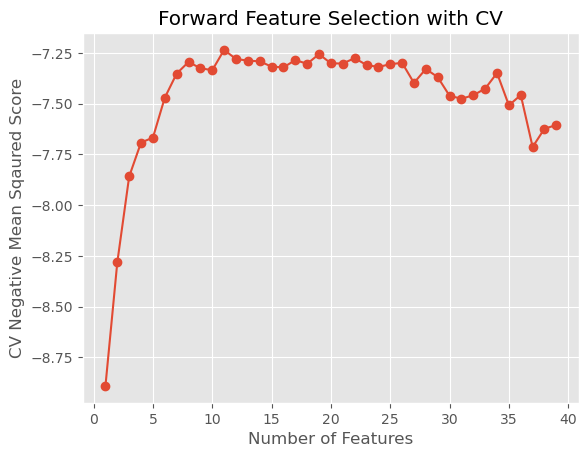

In [27]:
# Plot
plt.plot(results_forward['num_features'], results_forward['avg_score'], marker='o')
plt.xlabel('Number of Features')
plt.ylabel('CV Negative Mean Sqaured Score')
plt.title('Forward Feature Selection with CV')
plt.grid(True)
plt.show()

## Backward Selection

In [28]:
sfs_backward = SFS(model,
          k_features=(1,len(X_processed_df.columns)), # Number of features to select
          forward=False,   # Forward selection
          floating=False, # No floating
          scoring='neg_mean_squared_error',  # Scoring metric
          n_jobs=-1, # Use all processors
          cv=cv)           # Cross-validation folds

In [29]:
sfs_backward = sfs_backward.fit(X_processed_df, y)

In [30]:
results_backward = pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T
results_backward['num_features'] = results_backward.index.astype(int)
results_backward

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,num_features
39,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-10.29024253968733, -6.5238404397064285, -7.7...",-7.632493,"(age, Medu, Fedu, traveltime, studytime, failu...",1.966766,1.530211,0.765106,39
38,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-6.981851470407612, -8.152121934840993, -6.09...",-7.537392,"(age, Medu, Fedu, traveltime, studytime, failu...",1.257121,0.978083,0.489042,38
37,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-10.056775755236172, -5.949604520399313, -6.1...",-7.504945,"(age, Medu, Fedu, traveltime, studytime, failu...",2.129756,1.657023,0.828511,37
36,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[-5.7074208158755075, -8.516994352850858, -7.8...",-7.463904,"(age, Fedu, traveltime, studytime, failures, f...",1.270087,0.988171,0.494085,36
35,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[-7.180525607357387, -9.005530355157953, -6.00...",-7.464529,"(age, Fedu, traveltime, studytime, failures, f...",1.594522,1.240593,0.620296,35
34,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[-9.341200009080858, -5.800708505299041, -5.89...",-7.4515,"(age, Fedu, traveltime, studytime, failures, f...",1.806938,1.405859,0.702929,34
33,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[-6.696435941783736, -7.431094058383541, -7.33...",-7.489191,"(age, Fedu, traveltime, studytime, failures, f...",0.620471,0.482748,0.241374,33
32,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[-6.50027689008708, -8.16950483792925, -6.7197...",-7.441945,"(age, Fedu, traveltime, studytime, failures, f...",1.28082,0.996522,0.498261,32
31,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[-8.533049955442138, -4.696724966855521, -8.54...",-7.4072,"(age, Fedu, traveltime, studytime, failures, f...",1.833722,1.426698,0.713349,31
30,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15...","[-7.081873461172879, -5.747766404651102, -7.75...",-7.41052,"(age, Fedu, traveltime, studytime, failures, f...",1.954751,1.520862,0.760431,30


In [32]:
highest_avg_score = results_backward['avg_score'].max()
best_model_backward = results_backward[results_backward['avg_score'] == highest_avg_score]
print(f"Best model: {best_model_backward['num_features'].values[0]} \nFeatures with an average negative mean squared score of {highest_avg_score:.4f}")
print(f"Features: {best_model_backward['feature_names'].values[0]}")

Best model: 7 
Features with an average negative mean squared score of -7.3033
Features: ('Fedu', 'studytime', 'failures', 'Walc', 'school_MS', 'schoolsup_yes', 'higher_yes')


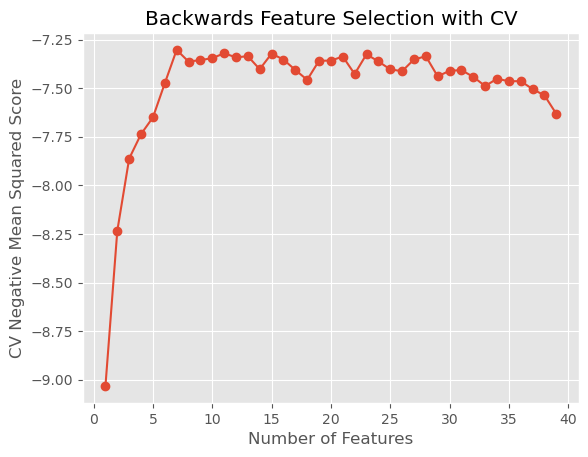

In [49]:
# Plot
plt.plot(results_backward['num_features'], results_backward['avg_score'], marker='o')
plt.xlabel('Number of Features')
plt.ylabel('CV Negative Mean Squared Score')
plt.title('Backwards Feature Selection with CV')
plt.grid(True)
plt.show()

## Stepwise Selection

In [34]:
sfs_stepwise = SFS(model,
          k_features=(1,len(X_processed_df.columns)), # Number of features to select
          forward=True,   # Forward selection
          floating=True, # No floating
          scoring='neg_mean_squared_error',  # Scoring metric
          n_jobs=-1, # Use all processors
          cv=cv)           # Cross-validation folds

In [35]:
sfs_stepwise = sfs_stepwise.fit(X_processed_df, y)

In [36]:
results_stepwise = pd.DataFrame.from_dict(sfs_stepwise.get_metric_dict()).T
results_stepwise['num_features'] = results_stepwise.index.astype(int)
results_stepwise

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,num_features
1,"(5,)","[-10.724662930721944, -8.243825218213699, -12....",-8.853291,"(failures,)",3.056503,2.378063,1.189032,1
2,"(5, 13)","[-13.834020508432939, -8.136272069522388, -6.4...",-8.357415,"(failures, school_MS)",3.602981,2.803241,1.401621,2
3,"(5, 13, 36)","[-8.502854034253643, -8.883517122445092, -7.15...",-7.915888,"(failures, school_MS, higher_yes)",0.871723,0.67823,0.339115,3
4,"(5, 9, 13, 36)","[-10.368748904619059, -6.040569612456087, -8.8...",-7.71001,"(failures, Dalc, school_MS, higher_yes)",2.125535,1.653739,0.826869,4
5,"(5, 9, 13, 31, 36)","[-8.045135720095812, -7.20429403251068, -8.324...",-7.585847,"(failures, Dalc, school_MS, schoolsup_yes, hig...",0.742629,0.57779,0.288895,5
6,"(4, 5, 9, 13, 31, 36)","[-6.357312449812976, -6.563741586591882, -5.49...",-7.511741,"(studytime, failures, Dalc, school_MS, schools...",2.566638,1.996932,0.998466,6
7,"(1, 4, 5, 9, 13, 31, 36)","[-6.690584887088468, -7.059299367977734, -6.88...",-7.369425,"(Medu, studytime, failures, Dalc, school_MS, s...",1.222594,0.95122,0.47561,7
8,"(1, 4, 5, 9, 10, 13, 31, 36)","[-7.583153304979832, -6.946308533085417, -7.24...",-7.33984,"(Medu, studytime, failures, Dalc, Walc, school...",0.533031,0.414716,0.207358,8
9,"(1, 4, 5, 9, 10, 13, 14, 31, 36)","[-6.9462151692439456, -8.93289640992312, -7.16...",-7.298731,"(Medu, studytime, failures, Dalc, Walc, school...",1.490306,1.159508,0.579754,9
10,"(1, 3, 4, 5, 9, 10, 13, 14, 31, 36)","[-5.783593484065962, -7.6185528464217604, -6.8...",-7.30554,"(Medu, traveltime, studytime, failures, Dalc, ...",2.012938,1.566134,0.783067,10


In [37]:
highest_avg_score = results_stepwise['avg_score'].max()
best_model_stepwise = results_stepwise[results_stepwise['avg_score'] == highest_avg_score]
print(f"Best model: {best_model_stepwise['num_features'].values[0]} \nFeatures with an average neagtive mean square error score of {highest_avg_score:.4f}")
print(f"Features: {best_model_stepwise['feature_names'].values[0]}")

Best model: 15 
Features with an average neagtive mean square error score of -7.1850
Features: ('Medu', 'traveltime', 'studytime', 'failures', 'freetime', 'Dalc', 'Walc', 'health', 'school_MS', 'sex_M', 'Fjob_teacher', 'schoolsup_yes', 'activities_yes', 'higher_yes', 'romantic_yes')


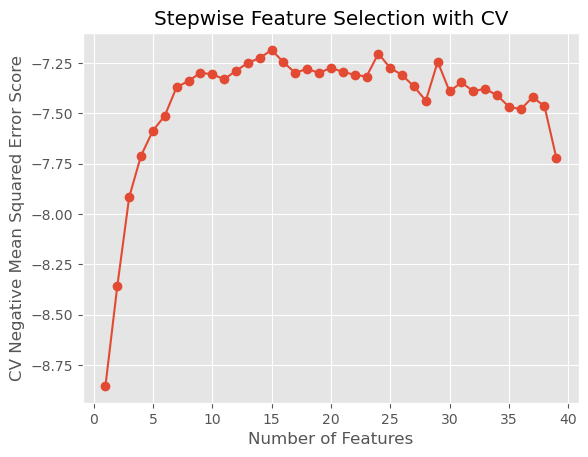

In [44]:
# Plot
plt.plot(results_stepwise['num_features'], results_stepwise['avg_score'], marker='o')
plt.xlabel('Number of Features')
plt.ylabel('CV Negative Mean Squared Error Score')
plt.title('Stepwise Feature Selection with CV')
plt.grid(True)
plt.show()

# Comparing 3 models

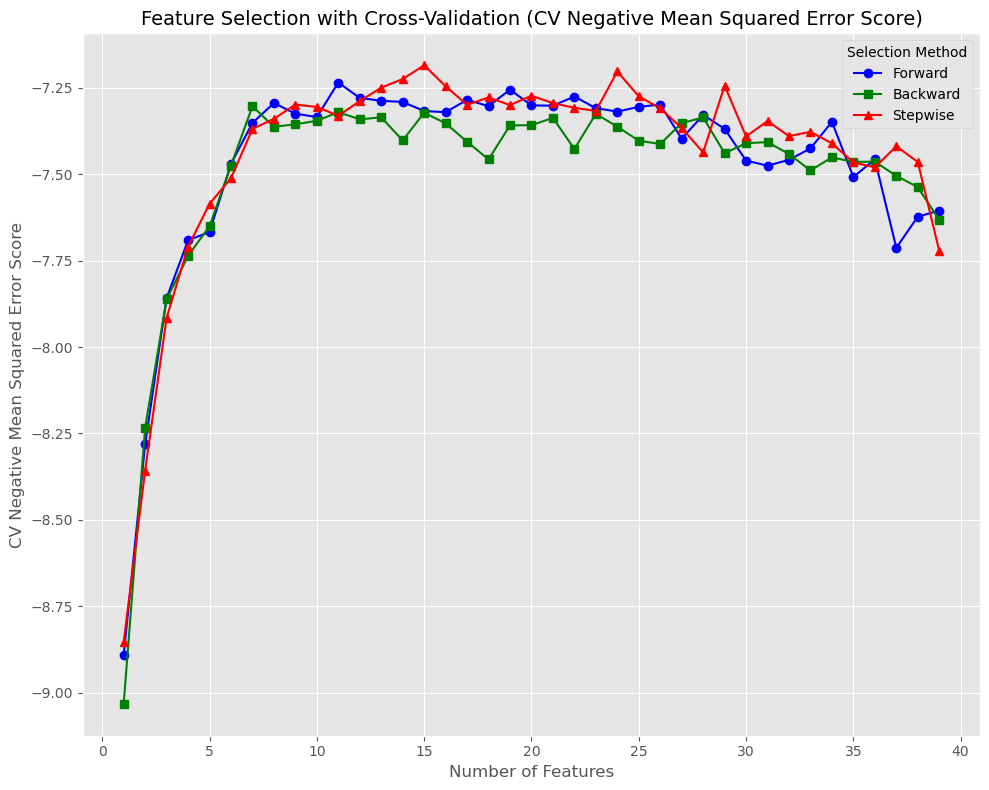

In [45]:
plt.figure(figsize=(10, 8))
plt.title('Feature Selection with Cross-Validation (CV Negative Mean Squared Error Score)', fontsize=14)

# Plot each selection method
plt.plot(results_forward['num_features'], results_forward['avg_score'], marker='o', label='Forward', color='blue')
plt.plot(results_backward['num_features'], results_backward['avg_score'], marker='s', label='Backward', color='green')
plt.plot(results_stepwise['num_features'], results_stepwise['avg_score'], marker='^', label='Stepwise', color='red')

# Labels and formatting
plt.xlabel('Number of Features', fontsize=12)
plt.ylabel('CV Negative Mean Squared Error Score', fontsize=12)
plt.legend(title='Selection Method')
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
def processSubset(feature_set, X_train, y_train, X_test, y_test):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)].astype(float))
    regr = model.fit()
    RSS = ((regr.predict(X_test[list(feature_set)]) - y_test) ** 2).sum()
    summary = regr.summary()
    return {"model":regr, "RSS":RSS, "summary":summary, "features":feature_set} # Return model, RSS, and summary

In [46]:
# Forward Best Model Refit
X_train, X_test, y_train, y_test = train_test_split(X_processed_df[list(best_model_forward['feature_names'].values[0])], y, test_size=0.3, random_state=42)
forward_model = processSubset(best_model_forward['feature_names'].values[0], X_train, y_train, X_test, y_test)
print(f"Forward Best Model RSS: {forward_model['RSS']:.4f}")
print(f"Forward Best Model Number of Features: {len(forward_model['features'])}")
print(forward_model['summary'])


Forward Best Model RSS: 3320.7217
Forward Best Model Number of Features: 11
                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              339.3
Date:                Wed, 30 Apr 2025   Prob (F-statistic):                   7.02e-208
Time:                        22:09:53   Log-Likelihood:                         -1272.4
No. Observations:                 454   AIC:                                      2567.
Df Residuals:                     443   BIC:                                      2612.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err     

In [47]:
# Backward Best Model Refit
X_train, X_test, y_train, y_test = train_test_split(X_processed_df[list(best_model_backward['feature_names'].values[0])], y, test_size=0.3, random_state=42)
backward_model = processSubset(best_model_backward['feature_names'].values[0], X_train, y_train, X_test, y_test)
print(f"Backward Best Model RSS: {backward_model['RSS']:.4f}")
print(f"Backward Best Model Number of Features: {len(backward_model['features'])}")
print(backward_model['summary'])


Backward Best Model RSS: 3216.5307
Backward Best Model Number of Features: 7
                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                              477.9
Date:                Wed, 30 Apr 2025   Prob (F-statistic):                   4.78e-203
Time:                        22:10:04   Log-Likelihood:                         -1296.2
No. Observations:                 454   AIC:                                      2606.
Df Residuals:                     447   BIC:                                      2635.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err        

In [48]:
# Step-wise Best Model Refit
X_train, X_test, y_train, y_test = train_test_split(X_processed_df[list(best_model_stepwise['feature_names'].values[0])], y, test_size=0.3, random_state=42)
stepwise_model = processSubset(best_model_stepwise['feature_names'].values[0], X_train, y_train, X_test, y_test)
print(f"Stepwise Best Model RSS: {stepwise_model['RSS']:.4f}")
print(f"Stepwise Best Model Number of Features: {len(stepwise_model['features'])}")
print(stepwise_model['summary'])


Stepwise Best Model RSS: 3266.5486
Stepwise Best Model Number of Features: 15
                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.899
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              261.5
Date:                Wed, 30 Apr 2025   Prob (F-statistic):                   6.80e-208
Time:                        22:10:08   Log-Likelihood:                         -1260.4
No. Observations:                 454   AIC:                                      2551.
Df Residuals:                     439   BIC:                                      2613.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err      